In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные вылаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых rлиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [19]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [20]:
### Your code is here
data_2 = data.copy()
categorical_columns = data.loc[:,data.dtypes==object].columns.to_list()
for col in categorical_columns:
    one_hot = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat((data.drop(col, axis=1), one_hot), axis=1)


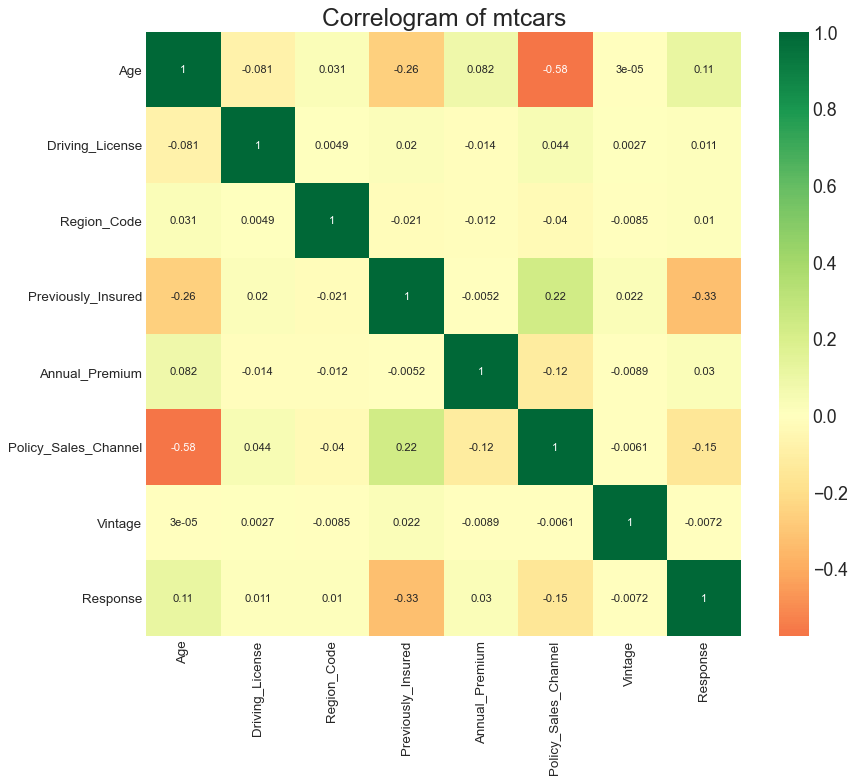

In [21]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_2.corr(), xticklabels=data_2.corr().columns, yticklabels=data_2.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

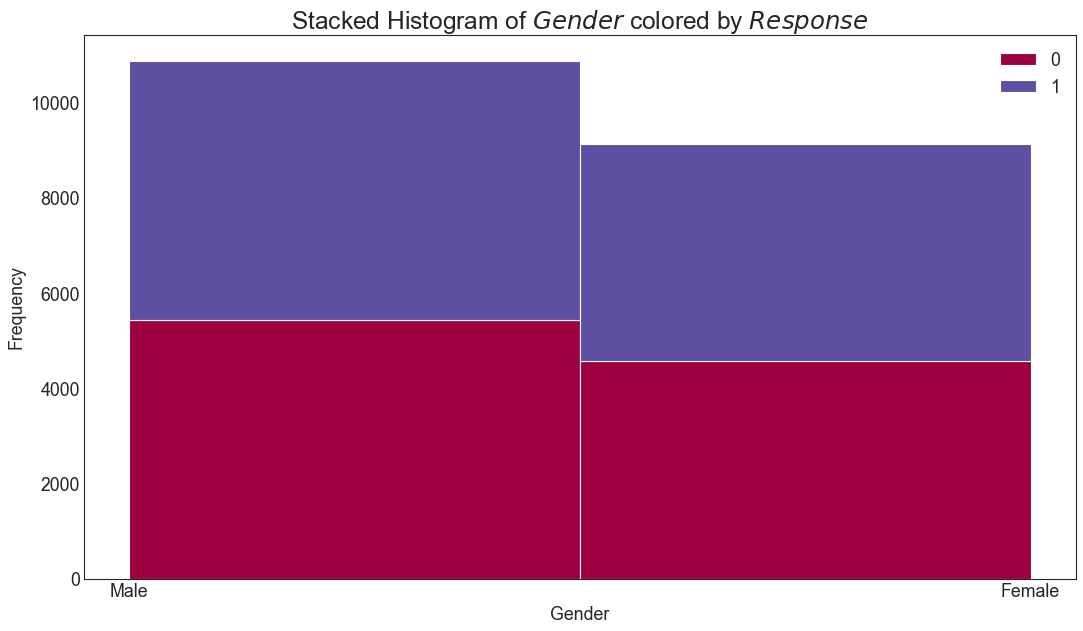

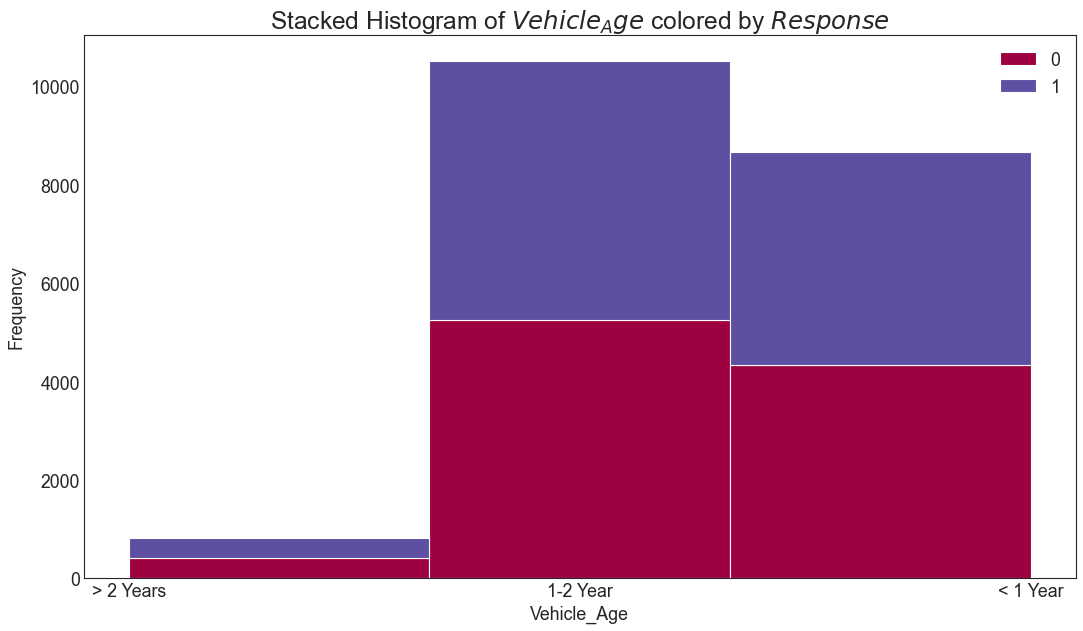

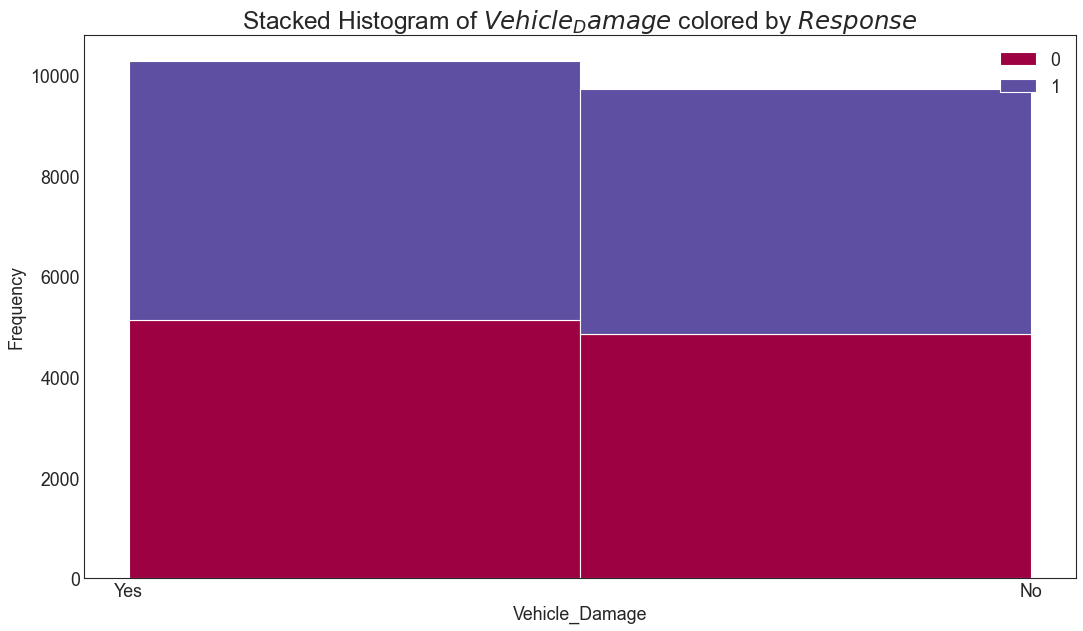

In [22]:
# Prepare data
for x_var in data_2.loc[:,data_2.dtypes==object].columns.to_list():
    #x_var = 'Vehicle_Age'
    groupby_var = 'Response'
    df_agg = data_2.loc[:, [x_var, groupby_var]].groupby(groupby_var)
    vals = [data_2[x_var].values.tolist() for i, df in df_agg]

    # Draw
    plt.figure(figsize=(16,9), dpi= 80)
    colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
    n, bins, patches = plt.hist(vals, data_2[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

    # Decoration
    plt.legend({group:col for group, col in zip(np.unique(data_2[groupby_var]).tolist(), colors[:len(vals)])})
    plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
    plt.xlabel(x_var)
    plt.ylabel("Frequency")
    #plt.ylim(0, 40)
    #plt.xticks(ticks=bins, labels=np.unique(data_2[x_var]).tolist(), rotation=90, horizontalalignment='left')
    plt.show()

In [23]:
data_2.loc[:,data_2.dtypes!=object].columns.to_list()

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

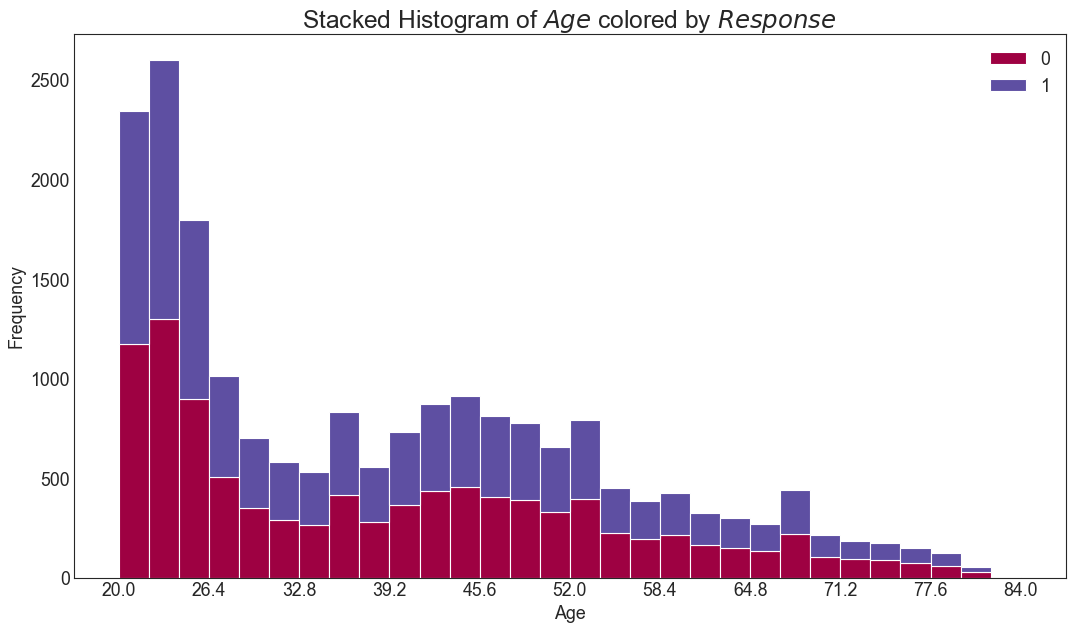

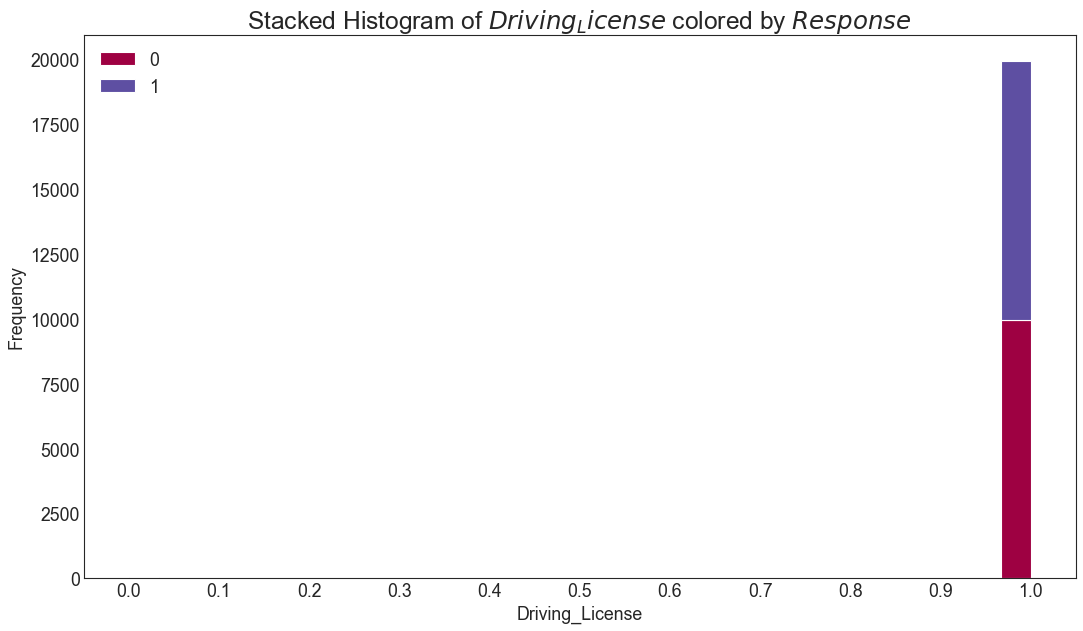

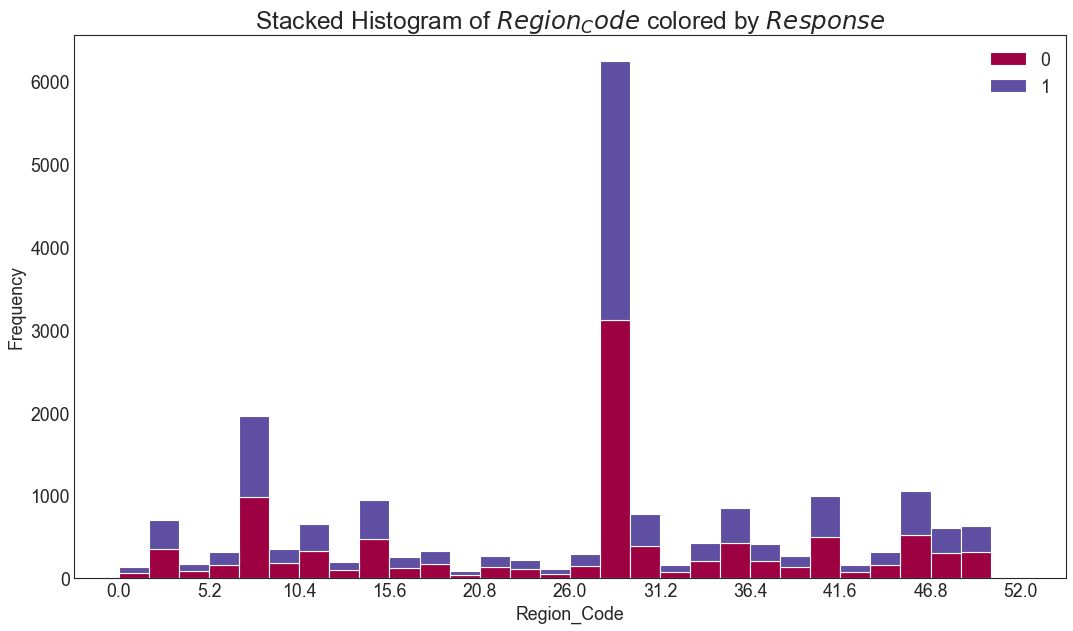

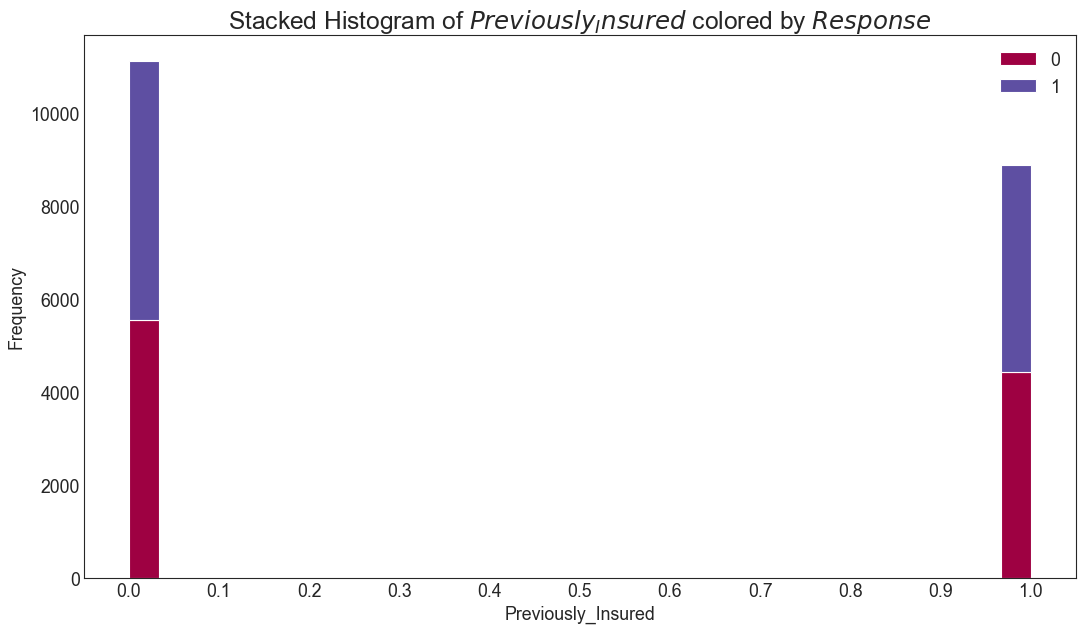

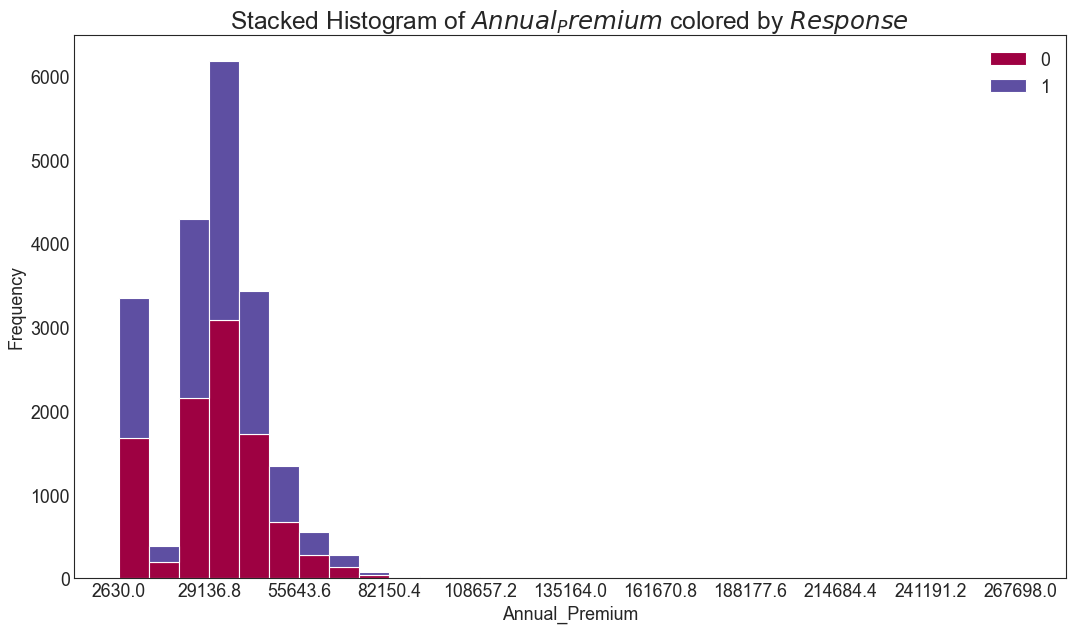

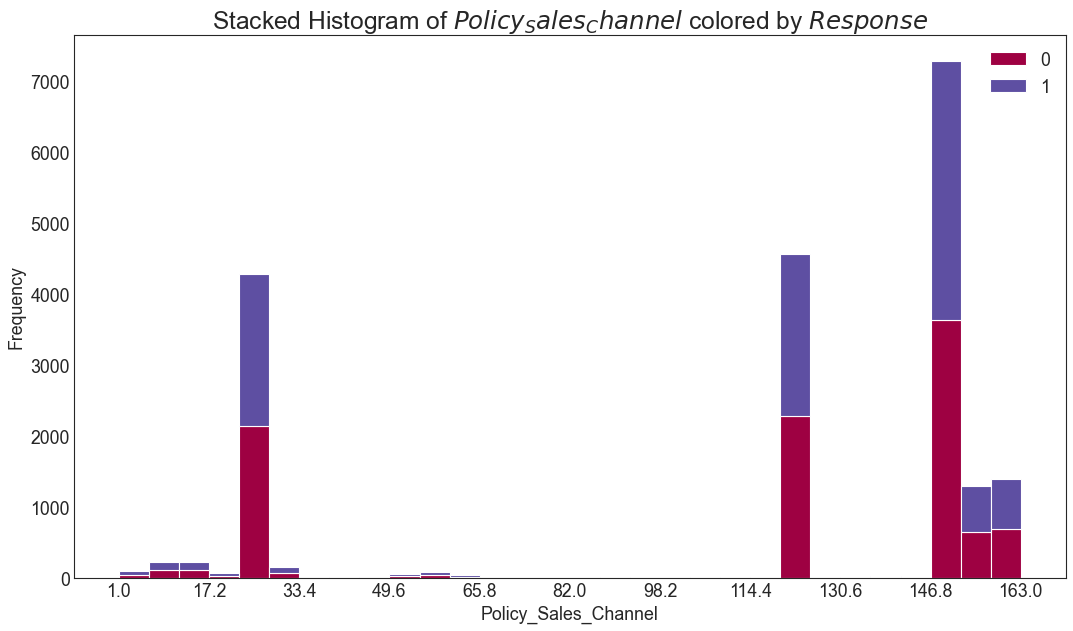

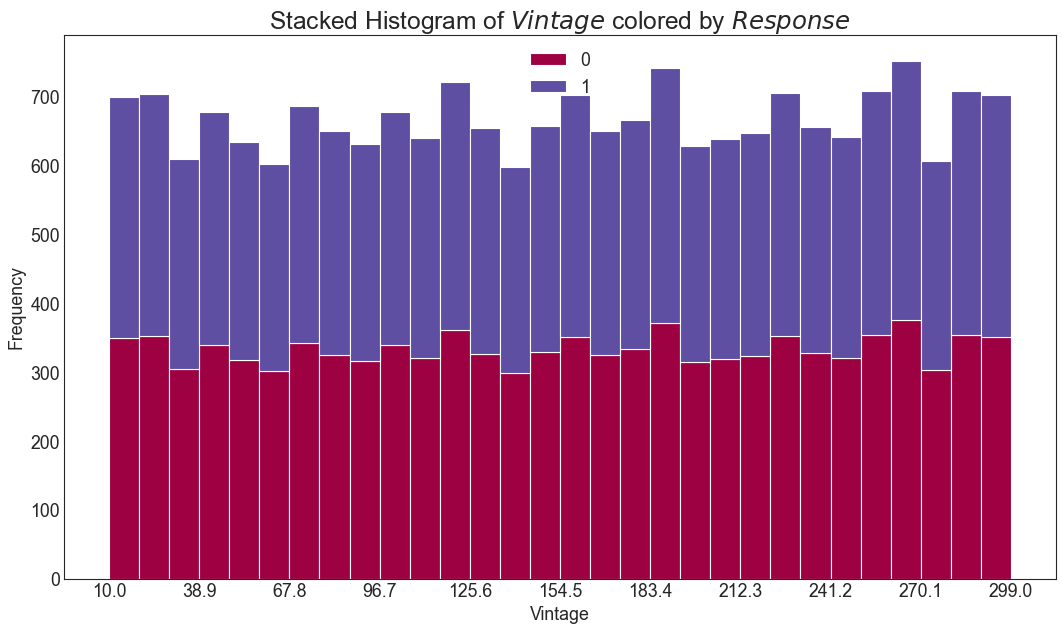

In [24]:
# Prepare data
for x_var in data_2.loc[:,data_2.dtypes!=object].columns.to_list()[:-1]:
    groupby_var = 'Response'
    df_agg = data_2.loc[:, [x_var, groupby_var]].groupby(groupby_var)
    vals = [data_2[x_var].values.tolist() for i, df in df_agg]

    # Draw
    plt.figure(figsize=(16,9), dpi= 80)
    colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
    n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

    # Decoration
    plt.legend({group:col for group, col in zip(np.unique(data_2[groupby_var]).tolist(), colors[:len(vals)])})
    plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
    plt.xlabel(x_var)
    plt.ylabel("Frequency")
    #plt.ylim(0, 25)
    plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
    plt.show()

In [25]:
data_2.Response.value_counts()

0    8753
1    1247
Name: Response, dtype: int64

**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

### Your code is here
model = GradientBoostingClassifier(learning_rate=1,
                                   random_state = 1,
                                   n_estimators=100)


In [28]:
model.fit(X_train, y_train)
    
accuracy_test = model.score(X_test, y_test)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:, 1]

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr, tpr)

0.828168754605748

Area under curve (AUC):  0.828168754605748


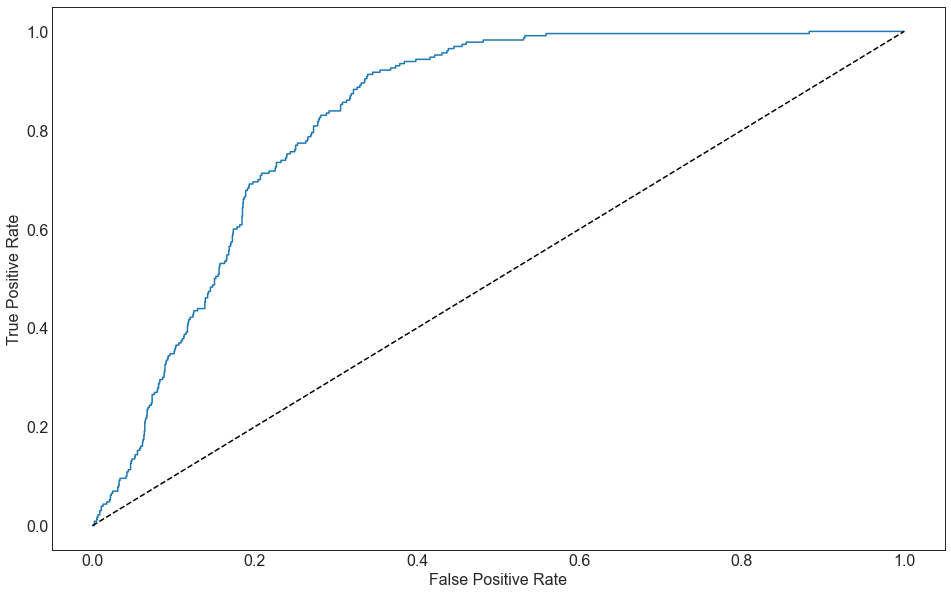

In [30]:
from sklearn.metrics import RocCurveDisplay
roc_display1 = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot((0,1), ls='dashed',color='black');
print ('Area under curve (AUC): ', auc(fpr, tpr))

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [31]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

In [32]:
### Your code is here
model = GradientBoostingClassifier(learning_rate=1,
                                   random_state = 1,
                                   n_estimators=100)
test_f1 = np.zeros((len(n_estimators_list), len(learning_rate_list)))#[[0]*len(learning_rate_list) for i in range(len(n_estimators_list)) ]

for i, s in enumerate(n_estimators_list):
    for j, lr in enumerate(learning_rate_list):    
        model.n_estimators = s
        model.learning_rate = lr
                                   
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
        test_f1[i][j]  = f1_score(y_test, y_pred, average='weighted')



In [33]:
df_f1 = pd.DataFrame(test_f1, columns=learning_rate_list, index=n_estimators_list)
df_f1

,1.00,0.10,0.01
5,0.831627,0.830759,0.831008
10,0.838842,0.830759,0.831008
20,0.841775,0.830759,0.831008
50,0.841602,0.830759,0.831008
100,0.842926,0.831971,0.830759
200,0.840530,0.835457,0.830759
700,0.842988,0.845544,0.830510
1000,0.841267,0.844815,0.831464


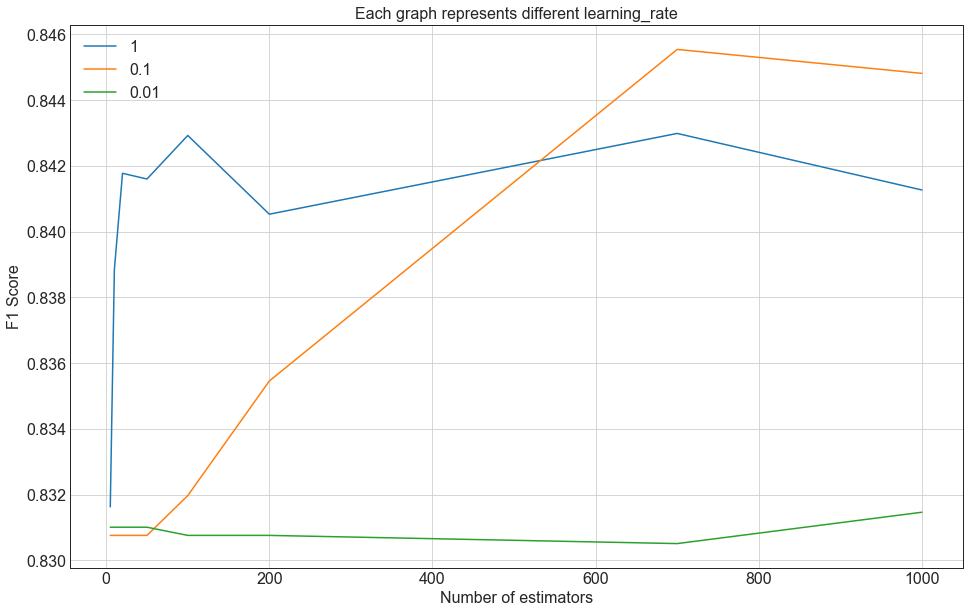

In [34]:
plt.plot(df_f1)

plt.title('Each graph represents different learning_rate')
plt.xlabel('Number of estimators')
plt.ylabel('F1 Score')

plt.grid()
plt.legend(learning_rate_list);

In [35]:
m = 0
for i, s in enumerate(n_estimators_list):
#     for j, lr in enumerate(learning_rate_list):   
#         #print(test_f1[i][j], end=' ')
    mi = max(test_f1[i])
    if  mi > m:
        m = mi
print(round(mi, 3))

0.845


In [51]:

# plt.figure(figsize=(12,10), dpi= 80)
# sns.heatmap(df_f1.corr(), xticklabels=df_f1.corr().columns, yticklabels=df_f1.corr().columns, cmap='RdYlGn', center=0, annot=True)

# # Decorations
# plt.title('Correlogram of mtcars', fontsize=22)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

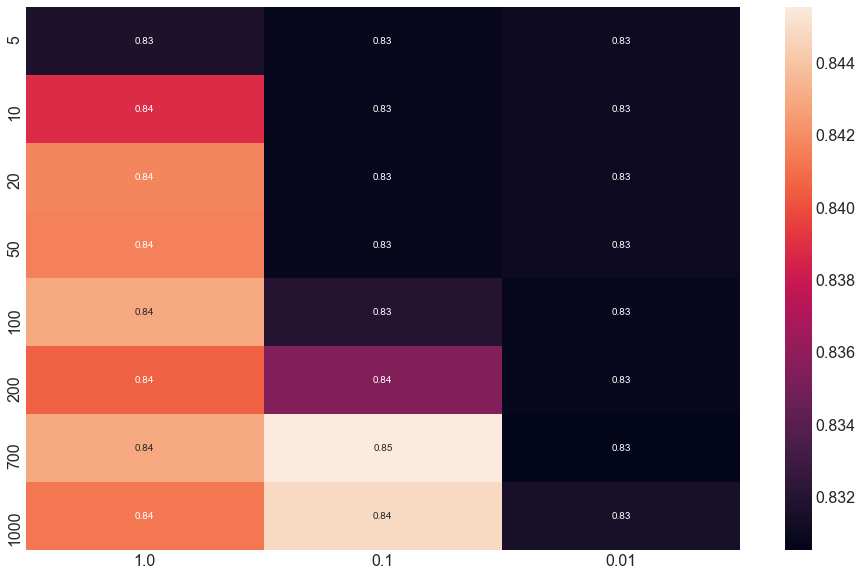

In [50]:
sns.heatmap(df_f1, annot=True);

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [37]:
def train_score(model, n_estimators, X_train, y_train):     
    model.n_estimators = s
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    score =  f1_score(y_train, y_pred, average='weighted')
    return score

In [38]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

### Your code is here

In [39]:
model_rf = RandomForestClassifier(random_state = 1, n_estimators=1)
model_2 = GradientBoostingClassifier(learning_rate=1,
                                   random_state = 1,
                                   n_estimators=100)

f1_rf = {5:[], 5000: []}
f1_b = {5:[], 5000: []}
for d in [5, 5000]:
    model_2.max_depth = d
    model_rf.max_depth = d
    for i, s in enumerate(n_estimators_list):
        f1_rf[d].append(train_score(model_rf, s, X_train, y_train))
        f1_b[d].append(train_score(model_2, s, X_train, y_train))
    

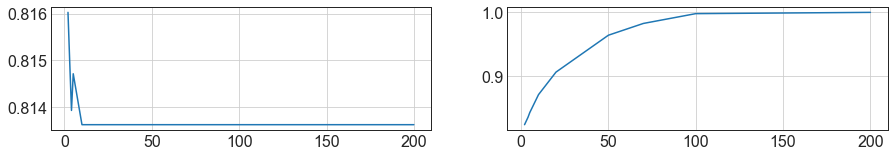

In [40]:
fig = plt.figure()
fig.set_size_inches(15, 5)

ax_1 = fig.add_subplot(2, 2, 1)
plt.plot(n_estimators_list[:10], f1_rf[5][:10])
plt.grid()
ax_2 = fig.add_subplot(2, 2, 2)
plt.plot(n_estimators_list[:10], f1_b[5][:10])
plt.grid()
plt.show()

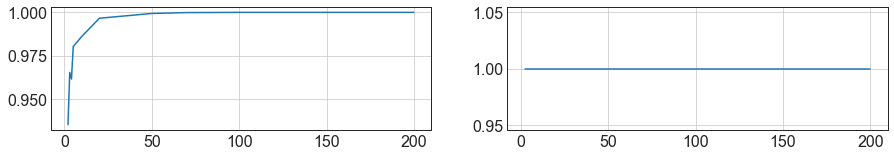

In [41]:
fig = plt.figure()
fig.set_size_inches(15, 5)

ax_1 = fig.add_subplot(2, 2, 1)
plt.plot(n_estimators_list[:10], f1_rf[5000][:10])
plt.grid()
ax_2 = fig.add_subplot(2, 2, 2)
plt.plot(n_estimators_list[:10], f1_b[5000][:10])
plt.grid()
plt.show()

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [42]:
# !pip install catboost

In [43]:
X_2 = data_2.drop('Response', axis=1)
y_2 = data_2['Response']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [44]:
from catboost import CatBoostClassifier

### Your code is here
catboost = CatBoostClassifier(random_state=1)

catboost.fit(X_train_2, y_train_2, cat_features=categorical_columns)


Learning rate set to 0.025035
0:	learn: 0.6585225	total: 68ms	remaining: 1m 7s
1:	learn: 0.6268982	total: 77ms	remaining: 38.4s
2:	learn: 0.5928588	total: 83.8ms	remaining: 27.8s
3:	learn: 0.5650766	total: 90.3ms	remaining: 22.5s
4:	learn: 0.5422486	total: 97.1ms	remaining: 19.3s
5:	learn: 0.5180757	total: 104ms	remaining: 17.2s
6:	learn: 0.4967701	total: 110ms	remaining: 15.6s
7:	learn: 0.4783631	total: 117ms	remaining: 14.5s
8:	learn: 0.4615549	total: 123ms	remaining: 13.6s
9:	learn: 0.4527304	total: 129ms	remaining: 12.8s
10:	learn: 0.4445958	total: 136ms	remaining: 12.2s
11:	learn: 0.4300633	total: 142ms	remaining: 11.7s
12:	learn: 0.4153701	total: 149ms	remaining: 11.3s
13:	learn: 0.4046506	total: 155ms	remaining: 10.9s
14:	learn: 0.3953227	total: 161ms	remaining: 10.6s
15:	learn: 0.3908375	total: 167ms	remaining: 10.3s
16:	learn: 0.3866243	total: 177ms	remaining: 10.2s
17:	learn: 0.3780907	total: 183ms	remaining: 9.99s
18:	learn: 0.3711807	total: 189ms	remaining: 9.78s
19:	learn:

186:	learn: 0.2633289	total: 1.21s	remaining: 5.25s
187:	learn: 0.2632162	total: 1.22s	remaining: 5.26s
188:	learn: 0.2630554	total: 1.23s	remaining: 5.26s
189:	learn: 0.2629508	total: 1.23s	remaining: 5.26s
190:	learn: 0.2628770	total: 1.24s	remaining: 5.25s
191:	learn: 0.2628289	total: 1.25s	remaining: 5.25s
192:	learn: 0.2627011	total: 1.25s	remaining: 5.24s
193:	learn: 0.2625570	total: 1.26s	remaining: 5.24s
194:	learn: 0.2625240	total: 1.27s	remaining: 5.23s
195:	learn: 0.2624443	total: 1.27s	remaining: 5.22s
196:	learn: 0.2623630	total: 1.28s	remaining: 5.23s
197:	learn: 0.2622702	total: 1.29s	remaining: 5.22s
198:	learn: 0.2620650	total: 1.3s	remaining: 5.22s
199:	learn: 0.2619387	total: 1.31s	remaining: 5.23s
200:	learn: 0.2618702	total: 1.31s	remaining: 5.22s
201:	learn: 0.2617919	total: 1.32s	remaining: 5.22s
202:	learn: 0.2617038	total: 1.33s	remaining: 5.21s
203:	learn: 0.2614774	total: 1.33s	remaining: 5.21s
204:	learn: 0.2613506	total: 1.34s	remaining: 5.22s
205:	learn: 0

351:	learn: 0.2500343	total: 2.62s	remaining: 4.83s
352:	learn: 0.2499543	total: 2.63s	remaining: 4.82s
353:	learn: 0.2498959	total: 2.64s	remaining: 4.82s
354:	learn: 0.2498510	total: 2.65s	remaining: 4.81s
355:	learn: 0.2497435	total: 2.65s	remaining: 4.8s
356:	learn: 0.2497434	total: 2.65s	remaining: 4.78s
357:	learn: 0.2496650	total: 2.66s	remaining: 4.77s
358:	learn: 0.2495788	total: 2.67s	remaining: 4.76s
359:	learn: 0.2494570	total: 2.67s	remaining: 4.75s
360:	learn: 0.2494109	total: 2.68s	remaining: 4.74s
361:	learn: 0.2493255	total: 2.69s	remaining: 4.73s
362:	learn: 0.2491833	total: 2.69s	remaining: 4.72s
363:	learn: 0.2491138	total: 2.7s	remaining: 4.71s
364:	learn: 0.2490237	total: 2.7s	remaining: 4.71s
365:	learn: 0.2488897	total: 2.71s	remaining: 4.7s
366:	learn: 0.2488847	total: 2.71s	remaining: 4.68s
367:	learn: 0.2486902	total: 2.72s	remaining: 4.67s
368:	learn: 0.2486358	total: 2.73s	remaining: 4.67s
369:	learn: 0.2485294	total: 2.74s	remaining: 4.66s
370:	learn: 0.24

512:	learn: 0.2362891	total: 3.83s	remaining: 3.64s
513:	learn: 0.2362032	total: 3.84s	remaining: 3.63s
514:	learn: 0.2360951	total: 3.85s	remaining: 3.63s
515:	learn: 0.2360404	total: 3.88s	remaining: 3.64s
516:	learn: 0.2359506	total: 3.9s	remaining: 3.64s
517:	learn: 0.2359007	total: 3.91s	remaining: 3.64s
518:	learn: 0.2358368	total: 3.92s	remaining: 3.63s
519:	learn: 0.2358276	total: 3.92s	remaining: 3.62s
520:	learn: 0.2357377	total: 3.93s	remaining: 3.61s
521:	learn: 0.2357020	total: 3.94s	remaining: 3.6s
522:	learn: 0.2355589	total: 3.94s	remaining: 3.6s
523:	learn: 0.2354667	total: 3.95s	remaining: 3.59s
524:	learn: 0.2353478	total: 3.96s	remaining: 3.58s
525:	learn: 0.2353337	total: 3.96s	remaining: 3.57s
526:	learn: 0.2351782	total: 3.97s	remaining: 3.56s
527:	learn: 0.2350689	total: 3.98s	remaining: 3.56s
528:	learn: 0.2350396	total: 3.98s	remaining: 3.55s
529:	learn: 0.2349966	total: 3.99s	remaining: 3.54s
530:	learn: 0.2348723	total: 4s	remaining: 3.53s
531:	learn: 0.2347

693:	learn: 0.2229678	total: 5.28s	remaining: 2.33s
694:	learn: 0.2229316	total: 5.29s	remaining: 2.32s
695:	learn: 0.2228548	total: 5.3s	remaining: 2.31s
696:	learn: 0.2227698	total: 5.3s	remaining: 2.31s
697:	learn: 0.2226193	total: 5.31s	remaining: 2.3s
698:	learn: 0.2225563	total: 5.32s	remaining: 2.29s
699:	learn: 0.2224836	total: 5.33s	remaining: 2.28s
700:	learn: 0.2224344	total: 5.33s	remaining: 2.27s
701:	learn: 0.2223787	total: 5.34s	remaining: 2.27s
702:	learn: 0.2223631	total: 5.34s	remaining: 2.26s
703:	learn: 0.2223050	total: 5.35s	remaining: 2.25s
704:	learn: 0.2222313	total: 5.36s	remaining: 2.24s
705:	learn: 0.2221635	total: 5.36s	remaining: 2.23s
706:	learn: 0.2220707	total: 5.37s	remaining: 2.23s
707:	learn: 0.2220363	total: 5.38s	remaining: 2.22s
708:	learn: 0.2219788	total: 5.39s	remaining: 2.21s
709:	learn: 0.2219010	total: 5.39s	remaining: 2.2s
710:	learn: 0.2218074	total: 5.4s	remaining: 2.19s
711:	learn: 0.2217311	total: 5.41s	remaining: 2.19s
712:	learn: 0.221

857:	learn: 0.2121431	total: 6.5s	remaining: 1.07s
858:	learn: 0.2120903	total: 6.51s	remaining: 1.07s
859:	learn: 0.2120122	total: 6.53s	remaining: 1.06s
860:	learn: 0.2119262	total: 6.53s	remaining: 1.05s
861:	learn: 0.2118310	total: 6.54s	remaining: 1.05s
862:	learn: 0.2117277	total: 6.55s	remaining: 1.04s
863:	learn: 0.2116526	total: 6.56s	remaining: 1.03s
864:	learn: 0.2115846	total: 6.57s	remaining: 1.02s
865:	learn: 0.2115033	total: 6.58s	remaining: 1.02s
866:	learn: 0.2114333	total: 6.58s	remaining: 1.01s
867:	learn: 0.2113744	total: 6.59s	remaining: 1s
868:	learn: 0.2113451	total: 6.6s	remaining: 995ms
869:	learn: 0.2112745	total: 6.6s	remaining: 987ms
870:	learn: 0.2111762	total: 6.61s	remaining: 979ms
871:	learn: 0.2111211	total: 6.62s	remaining: 971ms
872:	learn: 0.2110660	total: 6.63s	remaining: 964ms
873:	learn: 0.2110014	total: 6.63s	remaining: 956ms
874:	learn: 0.2109384	total: 6.64s	remaining: 948ms
875:	learn: 0.2108407	total: 6.64s	remaining: 941ms
876:	learn: 0.2107

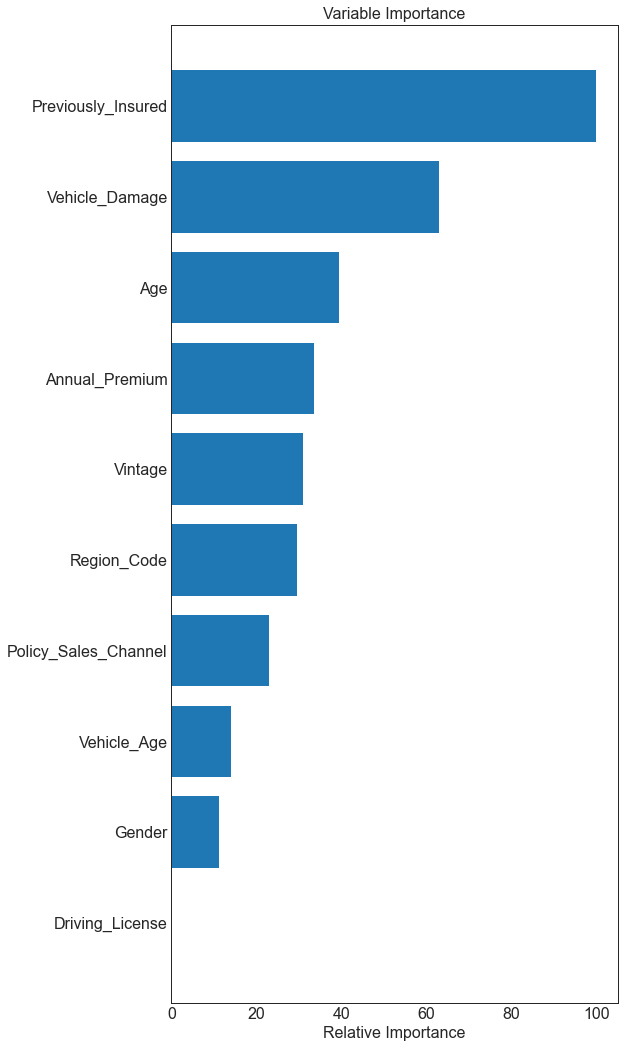

In [45]:
c_feature_importance = catboost.feature_importances_
c_feature_importance = 100.0 * (c_feature_importance / c_feature_importance.max())
sorted_idx = np.argsort(c_feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, c_feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_2.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

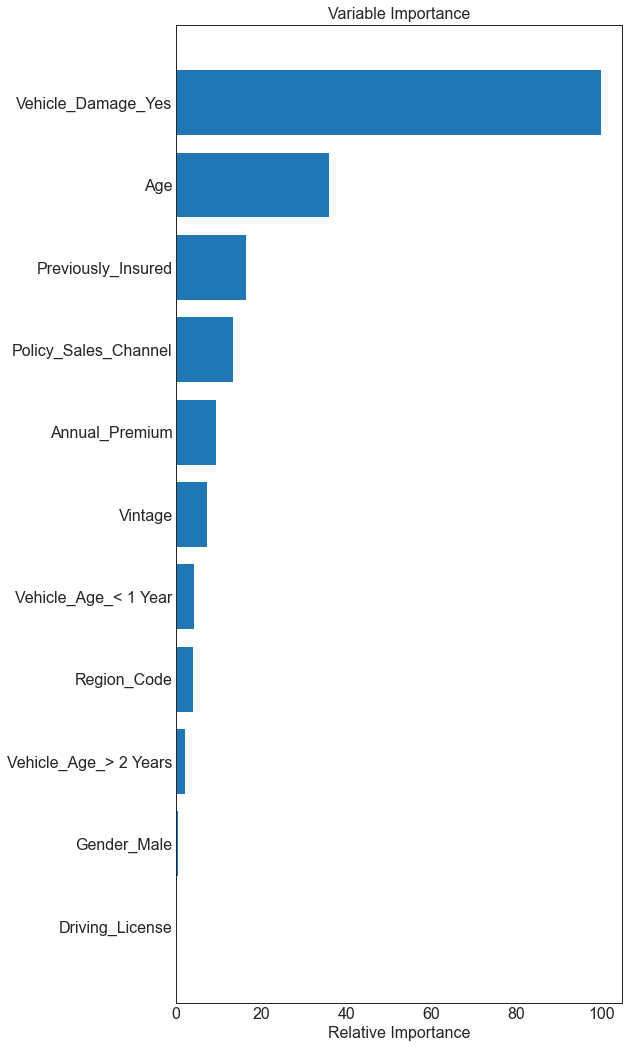

In [46]:
g_feature_importance = model.feature_importances_
g_feature_importance = 100.0 * (g_feature_importance / g_feature_importance.max())
sorted_idx = np.argsort(g_feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, g_feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

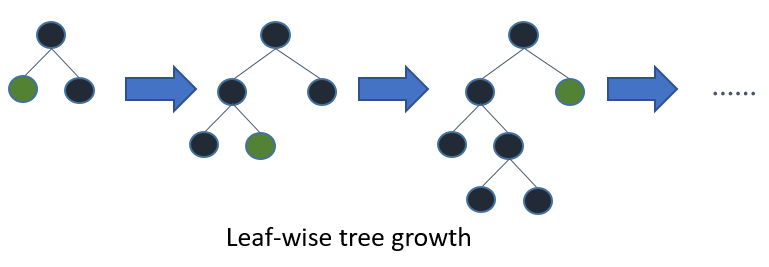

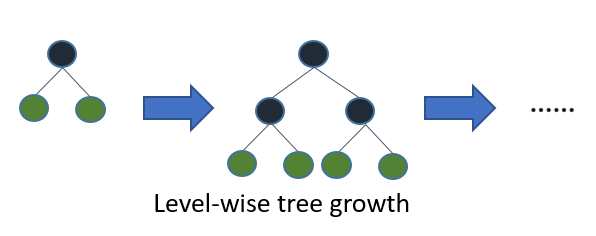

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [47]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

### Your code is here

model = LGBMClassifier(random_state=1)

/Users/olgamorozova/opt/anaconda3/lib/python3.8/site-packages/fsspec/registry.py:188: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  minversions = {"s3fs": LooseVersion("0.3.0"), "gcsfs": LooseVersion("0.3.0")}
/Users/olgamorozova/opt/anaconda3/lib/python3.8/site-packages/dask/compatibility.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PY_VERSION = LooseVersion(".".join(map(str, sys.version_info[:3])))
/Users/olgamorozova/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _numpy_117 = LooseVersion(np.__version__) >= "1.17.0"
/Users/olgamorozova/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/olgamorozova/opt/an

In [48]:
search = GridSearchCV(model, params)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.87288):
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}


In [49]:
print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1770
           1       0.00      0.00      0.00       230

    accuracy                           0.89      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.78      0.89      0.83      2000



/Users/olgamorozova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olgamorozova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olgamorozova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)